<a href="https://colab.research.google.com/github/Tdas-christ/CV/blob/main/2348569_Non_Linear_Spatial_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading the image and necessary packages**

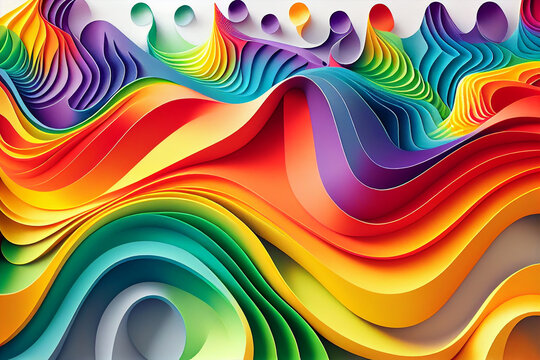

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Read the input image
img = cv2.imread('/content/drive/MyDrive/IMAGES (CV)/colorful_image.jpg')
cv2_imshow(img)

# **Minimum Filter**

Minimum Filtered Image


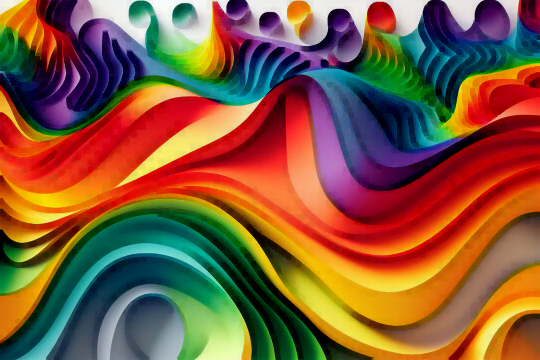

In [ ]:
# Define kernel size for minimum filtering
kernel_size = 5

# Apply minimum filtering
min_filtered = cv2.erode(img, np.ones((kernel_size, kernel_size), np.uint8))

# Display the result
print('Minimum Filtered Image')
cv2_imshow(min_filtered)
cv2.waitKey(0)
cv2.destroyAllWindows()

# **Maximum Filter**

Maximum Filtered Image


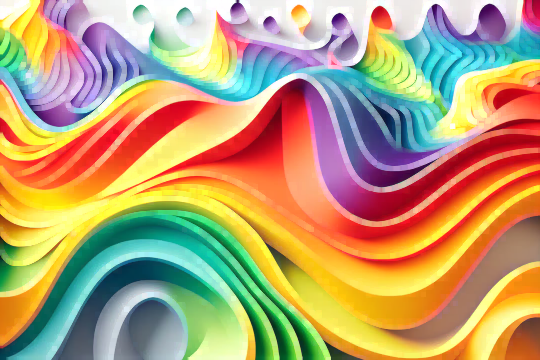

In [ ]:
# Apply maximum filtering
max_filtered = cv2.dilate(img, np.ones((kernel_size, kernel_size), np.uint8))

# Display the result
print('Maximum Filtered Image')
cv2_imshow(max_filtered)
cv2.waitKey(0)
cv2.destroyAllWindows()

# **Midpoint Filter**

Midpoint Filtered Image


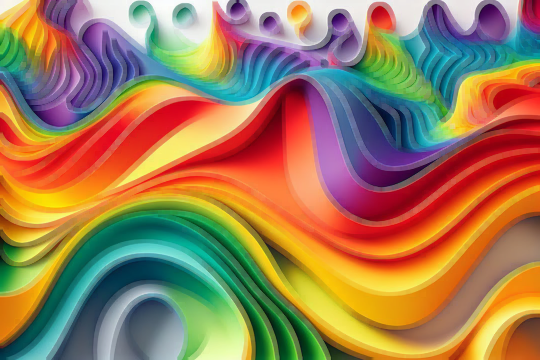

In [ ]:
# Define kernel size for midpoint filtering
kernel_size = 5

# Apply midpoint filtering
midpoint_filtered = cv2.addWeighted(min_filtered, 0.5, max_filtered, 0.5, 0)

# Display the result
print('Midpoint Filtered Image')
cv2_imshow(midpoint_filtered)
cv2.waitKey(0)
cv2.destroyAllWindows()

# **Median Filter**

Median Filtered Image (Using OpenCV)


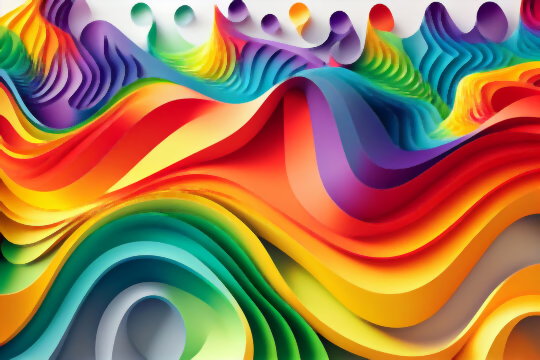

In [ ]:
# Apply median filtering using OpenCV built-in function
median_filtered_img_opencv = cv2.medianBlur(img, 5)  # Kernel size of 5

print('Median Filtered Image (Using OpenCV)')
cv2_imshow(median_filtered_img_opencv)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# Define the user-defined median filter function
def user_defined_median_filter(image, kernel_size):
    result_image = np.zeros_like(image)
    padding_size = kernel_size // 2
    padded_image = np.pad(image, padding_size, 'constant')

    for i in range(padding_size, padded_image.shape[0] - padding_size):
        for j in range(padding_size, padded_image.shape[1] - padding_size):
            # Extract the neighborhood for the median filter
            neighbors = padded_image[i - padding_size:i + padding_size + 1, j - padding_size:j + padding_size + 1]
            # Apply the median filter and assign the result to the corresponding pixel
            result_image[i - padding_size, j - padding_size] = np.median(neighbors)

    return result_image

In [ ]:
# Applying the user-defined median filter function
median_filtered_img1 = user_defined_median_filter(img, 5)

Median Filtered Image (User-Defined Function)


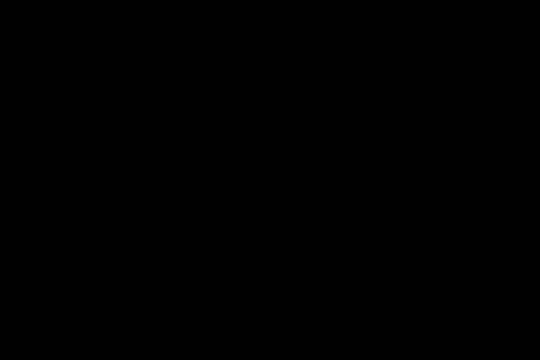

In [ ]:
# Display the filtered image using the user-defined function
print('Median Filtered Image (User-Defined Function)')
cv2_imshow(median_filtered_img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

# **Alpha-trimmed Filters**

Colored Image with Alpha-trimmed Mean Filter


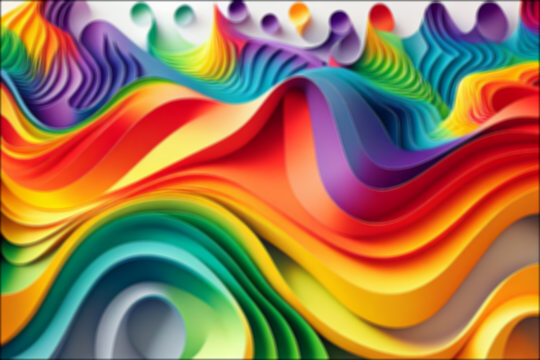

In [ ]:
def alpha_trimmed_mean_filter(image, d, alpha):
    # Split the image into channels
    b, g, r = cv2.split(image)

    # Apply the filter to each channel
    b_filtered = apply_alpha_trimmed_filter(b, d, alpha)
    g_filtered = apply_alpha_trimmed_filter(g, d, alpha)
    r_filtered = apply_alpha_trimmed_filter(r, d, alpha)

    # Merge the filtered channels back into the image
    filtered_image = cv2.merge([b_filtered, g_filtered, r_filtered])

    return filtered_image

def apply_alpha_trimmed_filter(channel, d, alpha):
    # Define padding size
    pad_size = d // 2

    # Apply padding to the channel
    padded_channel = cv2.copyMakeBorder(channel, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_CONSTANT)

    # Initialize result channel
    result_channel = np.zeros_like(channel, dtype=np.float32)

    # Apply alpha-trimmed mean filter to the channel
    for i in range(pad_size, padded_channel.shape[0] - pad_size):
        for j in range(pad_size, padded_channel.shape[1] - pad_size):
            # Extract the neighborhood
            neighborhood = padded_channel[i - pad_size:i + pad_size + 1, j - pad_size:j + pad_size + 1]
            # Sort the neighborhood
            sorted_neighborhood = np.sort(neighborhood.flatten())
            # Apply alpha-trimming
            trimmed_neighborhood = sorted_neighborhood[int(alpha * d * d / 2):int(d * d - alpha * d * d / 2)]
            # Calculate the mean
            mean = np.mean(trimmed_neighborhood)
            # Assign mean to result channel
            result_channel[i - pad_size, j - pad_size] = mean

    return result_channel.astype(np.uint8)

# Define window size (d) and alpha value
window_size = 5
alpha = 0.2

# Apply alpha-trimmed mean filter to the colored image
alpha_trimmed_filtered = alpha_trimmed_mean_filter(img, window_size, alpha)

# Display the result
print('Colored Image with Alpha-trimmed Mean Filter')
cv2_imshow(alpha_trimmed_filtered)
cv2.waitKey(0)
cv2.destroyAllWindows()

# **Bilateral Filtering**

Bilateral Filtered Image (Using OpenCV)


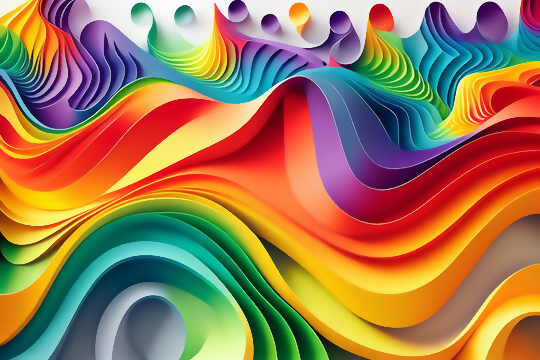

In [ ]:
# Apply bilateral filtering using OpenCV built-in function
bilateral_filtered_img = cv2.bilateralFilter(img, 9, 75, 75)

# Display the filtered image using OpenCV
print('Bilateral Filtered Image (Using OpenCV)')
cv2_imshow(bilateral_filtered_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Bilateral filtering does not typically have a straightforward user-defined implementation due to its complexity and the specialized nature of the algorithm.

# **Anisotropic Diffusion**

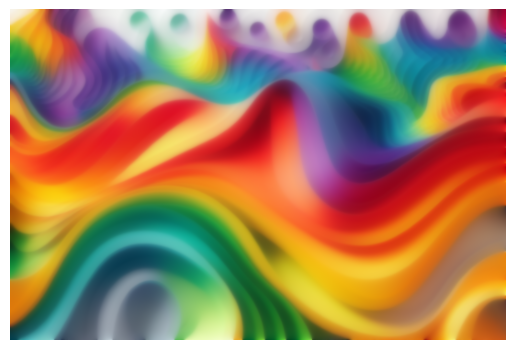

In [ ]:
from skimage.restoration import denoise_tv_bregman
import matplotlib.pyplot as plt
from PIL import Image

# Read the input image
img = np.array(Image.open('/content/drive/MyDrive/IMAGES (CV)/colorful_image.jpg'))

# Apply anisotropic diffusion using scikit-image library
denoised_img = denoise_tv_bregman(img, 0.1)

# Display the denoised image
plt.imshow(denoised_img, cmap='gray')
plt.axis('off')
plt.show()

Anisotropic diffusion does not have a typical user-defined implementation due to its complex nature and specialized algorithms.